In [1]:
!pip install d3rlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 6.7 MB/s eta 0:00:00


In [2]:
#Include this at the top of your colab code
import os
if not os.path.exists('.mujoco_setup_complete'):
  # Get the prereqs
  !apt-get -qq update
  !apt-get -qq install -y libosmesa6-dev libgl1-mesa-glx libglfw3 libgl1-mesa-dev libglew-dev patchelf
  # Get Mujoco
  !mkdir ~/.mujoco
  !wget -q https://mujoco.org/download/mujoco210-linux-x86_64.tar.gz -O mujoco.tar.gz
  !tar -zxf mujoco.tar.gz -C "$HOME/.mujoco"
  !rm mujoco.tar.gz
  # Add it to the actively loaded path and the bashrc path (these only do so much)
  !echo 'export LD_LIBRARY_PATH=$LD_LIBRARY_PATH:$HOME/.mujoco/mujoco210/bin' >> ~/.bashrc 
  !echo 'export LD_PRELOAD=$LD_PRELOAD:/usr/lib/x86_64-linux-gnu/libGLEW.so' >> ~/.bashrc 
  # THE ANNOYING ONE, FORCE IT INTO LDCONFIG SO WE ACTUALLY GET ACCESS TO IT THIS SESSION
  !echo "/root/.mujoco/mujoco210/bin" > /etc/ld.so.conf.d/mujoco_ld_lib_path.conf
  !ldconfig
  # Install Mujoco-py
  !pip3 install -U 'mujoco-py<2.2,>=2.1'
  # run once
  !touch .mujoco_setup_complete

try:
  if _mujoco_run_once:
    pass
except NameError:
  _mujoco_run_once = False
if not _mujoco_run_once:
  # Add it to the actively loaded path and the bashrc path (these only do so much)
  try:
    os.environ['LD_LIBRARY_PATH']=os.environ['LD_LIBRARY_PATH'] + ':/root/.mujoco/mujoco210/bin'
    os.environ['LD_LIBRARY_PATH']=os.environ['LD_LIBRARY_PATH'] + ':/usr/lib/nvidia'
  except KeyError:
    os.environ['LD_LIBRARY_PATH']='/root/.mujoco/mujoco210/bin'
  try:
    os.environ['LD_PRELOAD']=os.environ['LD_PRELOAD'] + ':/usr/lib/x86_64-linux-gnu/libGLEW.so'
  except KeyError:
    os.environ['LD_PRELOAD']='/usr/lib/x86_64-linux-gnu/libGLEW.so'
  # presetup so we don't see output on first env initialization
  import mujoco_py
  _mujoco_run_once = True

Selecting previously unselected package libgl1-mesa-glx:amd64.
(Reading database ... 122349 files and directories currently installed.)
Preparing to unpack .../00-libgl1-mesa-glx_21.2.6-0ubuntu0.1~20.04.2_amd64.deb ...
Unpacking libgl1-mesa-glx:amd64 (21.2.6-0ubuntu0.1~20.04.2) ...
Selecting previously unselected package libgles1:amd64.
Preparing to unpack .../01-libgles1_1.3.2-1~ubuntu0.20.04.2_amd64.deb ...
Unpacking libgles1:amd64 (1.3.2-1~ubuntu0.20.04.2) ...
Selecting previously unselected package libgles-dev:amd64.
Preparing to unpack .../02-libgles-dev_1.3.2-1~ubuntu0.20.04.2_amd64.deb ...
Unpacking libgles-dev:amd64 (1.3.2-1~ubuntu0.20.04.2) ...
Selecting previously unselected package libopengl-dev:amd64.
Preparing to unpack .../03-libopengl-dev_1.3.2-1~ubuntu0.20.04.2_amd64.deb ...
Unpacking libopengl-dev:amd64 (1.3.2-1~ubuntu0.20.04.2) ...
Selecting previously unselected package libglvnd-dev:amd64.
Preparing to unpack .../04-libglvnd-dev_1.3.2-1~ubuntu0.20.04.2_amd64.deb ...


In [5]:
!pip install git+https://github.com/tinkoff-ai/d4rl@master#egg=d4rl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/tinkoff-ai/d4rl (to revision master) to /tmp/pip-install-1pjvhxkc/d4rl_1c0c8f91729349199febe8286f7d6725
  Running command git clone --filter=blob:none --quiet https://github.com/tinkoff-ai/d4rl /tmp/pip-install-1pjvhxkc/d4rl_1c0c8f91729349199febe8286f7d6725
  Resolved https://github.com/tinkoff-ai/d4rl to commit db6e4b34bb5ce2a51dd3879177c0a0223208a614
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/aravindr93/mjrl (to revision master) to /tmp/pip-install-1pjvhxkc/mjrl_3d48783c898f4c6e813b6ededf8e8859
  Running command git clone --filter=blob:none --quiet https://github.com/aravindr93/mjrl /tmp/pip-install-1pjvhxkc/mjrl_3d48783c898f4c6e813b6ededf8e8859
  Resolved https://github.com/aravindr93/mjrl to commit 3871d93763d3b49c4741e6daeaebbc605fe140dc
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 626.2/6

In [91]:
import d3rlpy
from d3rlpy.algos import CQL, IQL
from sklearn.model_selection import train_test_split
from d3rlpy.metrics.scorer import td_error_scorer
from d3rlpy.metrics.scorer import average_value_estimation_scorer
from d3rlpy.metrics.scorer import soft_opc_scorer
from d3rlpy.metrics.scorer import evaluate_on_environment
import matplotlib.pyplot as plt

In [123]:
cql_results = {}
iql_results = {}

In [142]:
def get_dataset(name):
    dataset, env = d3rlpy.datasets.get_dataset(name)    
    train_episodes, test_episodes = train_test_split(dataset.episodes)

    return train_episodes, test_episodes, env


def fit_model(model, train_episodes, test_episodes, env, n_steps, n_steps_per_epoch):
    return model.fit(
        train_episodes,
        eval_episodes=test_episodes,
        n_steps=n_steps,
        n_steps_per_epoch=n_steps_per_epoch,
        verbose=False,
        show_progress=False,
        scorers={
            'td_error': td_error_scorer,
            'value_scale': average_value_estimation_scorer,
            'environment': evaluate_on_environment(env),
            'soft_opc': soft_opc_scorer(return_threshold=180)
        })


def plot_result(cql_result, iql_result, name, tau):
    fig, axs = plt.subplots(2, 2)
    fig.suptitle(name + f', tau={tau}')

    cql_td_error = []
    iql_td_error = []
    cql_env_score = []
    iql_env_score = []
    cql_value_est = []
    iql_value_est = []
    cql_soft_opc = []
    iql_soft_opc = []
    for cql_item, iql_item in zip(cql_result, iql_result):
        cql_td_error.append(cql_item[1]['td_error'])
        iql_td_error.append(iql_item[1]['td_error'])
        cql_env_score.append(cql_item[1]['environment'])
        iql_env_score.append(iql_item[1]['environment'])
        cql_value_est.append(cql_item[1]['value_scale'])
        iql_value_est.append(iql_item[1]['value_scale'])
        cql_soft_opc.append(cql_item[1]['soft_opc'])
        iql_soft_opc.append(iql_item[1]['soft_opc'])

    axs[0, 0].plot(cql_td_error, label='CQL')
    axs[0, 0].plot(iql_td_error, label='IQL')
    axs[0, 0].set_title('Average TD Error')
    axs[0, 0].set_xlabel('epoch')
    axs[0, 0].set_ylabel('td error')
    axs[0, 0].legend()

    axs[0, 1].plot(cql_env_score, label='CQL')
    axs[0, 1].plot(iql_env_score, label='IQL')
    axs[0, 1].set_title('Environment Score')
    axs[0, 1].set_xlabel('epoch')
    axs[0, 1].set_ylabel('env score')
    axs[0, 1].legend()

    axs[1, 0].plot(cql_value_est, label='CQL')
    axs[1, 0].plot(iql_value_est, label='IQL')
    axs[1, 0].set_title('Average Value Estimation')
    axs[1, 0].set_xlabel('epoch')
    axs[1, 0].set_ylabel('value estimation')
    axs[1, 0].legend()

    axs[1, 1].plot(cql_soft_opc, label='CQL')
    axs[1, 1].plot(iql_soft_opc, label='IQL')
    axs[1, 1].set_title('Soft Off-Policy Classification Score')
    axs[1, 1].set_xlabel('epoch')
    axs[1, 1].set_ylabel('soft opc')
    axs[1, 1].legend()

    fig.tight_layout()


def run_experiment(env_name, tau=0.005, n_steps=1000, n_steps_per_epoch=100):
    train_episodes, test_episodes, env = get_dataset(env_name)
    
    cql_result = fit_model(CQL(tau=tau), train_episodes, test_episodes, env,
                           n_steps=n_steps, n_steps_per_epoch=n_steps_per_epoch)
    iql_result = fit_model(IQL(tau=tau), train_episodes, test_episodes, env,
                           n_steps=n_steps, n_steps_per_epoch=n_steps_per_epoch)
    
    plot_result(cql_result, iql_result, env_name, tau)
    cql_results[env_name + '$' + str(tau)] = cql_result
    iql_results[env_name + '$' + str(tau)] = iql_result


## Эксперименты

load datafile: 100%|██████████| 21/21 [00:01<00:00, 15.34it/s]


2023-04-10 19:11:30 [debug    ] RandomIterator is selected.
2023-04-10 19:11:30 [info     ] Directory is created at d3rlpy_logs/CQL_20230410191130
2023-04-10 19:11:30 [debug    ] Building models...
2023-04-10 19:11:30 [debug    ] Models have been built.


/usr/local/lib/python3.9/dist-packages/gym/utils/passive_env_checker.py:227: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 


2023-04-10 19:12:13 [info     ] Model parameters are saved to d3rlpy_logs/CQL_20230410191130/model_100.pt
2023-04-10 19:12:54 [info     ] Model parameters are saved to d3rlpy_logs/CQL_20230410191130/model_200.pt
2023-04-10 19:13:36 [info     ] Model parameters are saved to d3rlpy_logs/CQL_20230410191130/model_300.pt
2023-04-10 19:14:16 [info     ] Model parameters are saved to d3rlpy_logs/CQL_20230410191130/model_400.pt
2023-04-10 19:14:57 [info     ] Model parameters are saved to d3rlpy_logs/CQL_20230410191130/model_500.pt
2023-04-10 19:15:36 [info     ] Model parameters are saved to d3rlpy_logs/CQL_20230410191130/model_600.pt
2023-04-10 19:16:17 [info     ] Model parameters are saved to d3rlpy_logs/CQL_20230410191130/model_700.pt
2023-04-10 19:16:57 [info     ] Model parameters are saved to d3rlpy_logs/CQL_20230410191130/model_800.pt
2023-04-10 19:17:37 [info     ] Model parameters are saved to d3rlpy_logs/CQL_20230410191130/model_900.pt
2023-04-10 19:18:17 [info     ] Model paramete

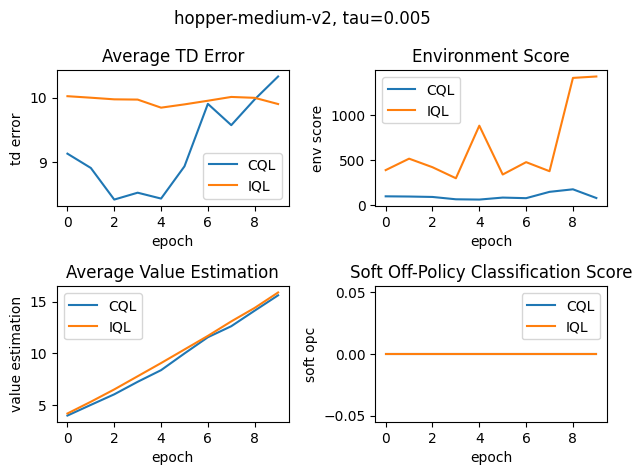

In [143]:
run_experiment("hopper-medium-v2")

load datafile: 100%|██████████| 21/21 [00:02<00:00,  7.36it/s]


2023-04-10 19:42:39 [debug    ] RandomIterator is selected.
2023-04-10 19:42:39 [info     ] Directory is created at d3rlpy_logs/CQL_20230410194239
2023-04-10 19:42:39 [debug    ] Building models...
2023-04-10 19:42:39 [debug    ] Models have been built.
2023-04-10 19:43:22 [info     ] Model parameters are saved to d3rlpy_logs/CQL_20230410194239/model_100.pt
2023-04-10 19:44:01 [info     ] Model parameters are saved to d3rlpy_logs/CQL_20230410194239/model_200.pt
2023-04-10 19:44:43 [info     ] Model parameters are saved to d3rlpy_logs/CQL_20230410194239/model_300.pt
2023-04-10 19:45:23 [info     ] Model parameters are saved to d3rlpy_logs/CQL_20230410194239/model_400.pt
2023-04-10 19:46:04 [info     ] Model parameters are saved to d3rlpy_logs/CQL_20230410194239/model_500.pt
2023-04-10 19:46:43 [info     ] Model parameters are saved to d3rlpy_logs/CQL_20230410194239/model_600.pt
2023-04-10 19:47:24 [info     ] Model parameters are saved to d3rlpy_logs/CQL_20230410194239/model_700.pt
2023

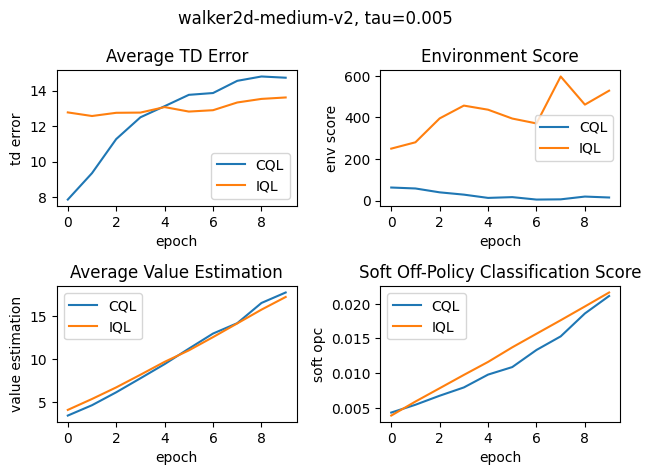

In [146]:
run_experiment("walker2d-medium-v2")

load datafile: 100%|██████████| 9/9 [00:02<00:00,  3.32it/s]


2023-04-10 19:20:55 [debug    ] RandomIterator is selected.
2023-04-10 19:20:55 [info     ] Directory is created at d3rlpy_logs/CQL_20230410192055
2023-04-10 19:20:55 [debug    ] Building models...
2023-04-10 19:20:55 [debug    ] Models have been built.
2023-04-10 19:21:46 [info     ] Model parameters are saved to d3rlpy_logs/CQL_20230410192055/model_100.pt
2023-04-10 19:22:34 [info     ] Model parameters are saved to d3rlpy_logs/CQL_20230410192055/model_200.pt
2023-04-10 19:23:25 [info     ] Model parameters are saved to d3rlpy_logs/CQL_20230410192055/model_300.pt
2023-04-10 19:24:13 [info     ] Model parameters are saved to d3rlpy_logs/CQL_20230410192055/model_400.pt
2023-04-10 19:25:02 [info     ] Model parameters are saved to d3rlpy_logs/CQL_20230410192055/model_500.pt
2023-04-10 19:25:52 [info     ] Model parameters are saved to d3rlpy_logs/CQL_20230410192055/model_600.pt
2023-04-10 19:26:41 [info     ] Model parameters are saved to d3rlpy_logs/CQL_20230410192055/model_700.pt
2023

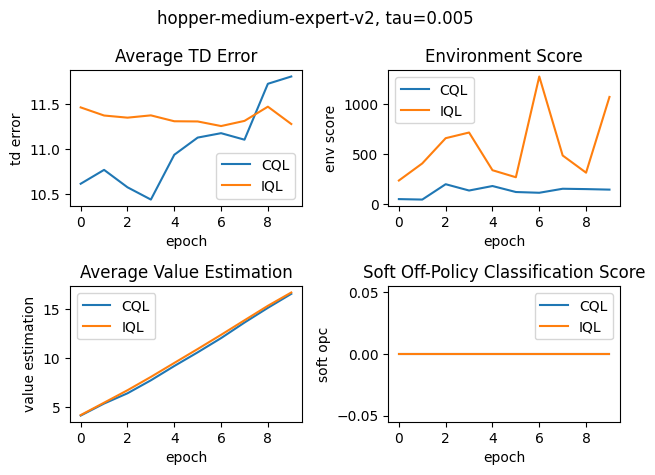

In [144]:
run_experiment("hopper-medium-expert-v2")

## Подбор значения гиперпараметра $\tau$ (неуспешный)

load datafile: 100%|██████████| 21/21 [00:01<00:00, 15.10it/s]


2023-04-10 20:02:40 [debug    ] RandomIterator is selected.
2023-04-10 20:02:40 [info     ] Directory is created at d3rlpy_logs/CQL_20230410200240
2023-04-10 20:02:40 [debug    ] Building models...
2023-04-10 20:02:40 [debug    ] Models have been built.
2023-04-10 20:03:22 [info     ] Model parameters are saved to d3rlpy_logs/CQL_20230410200240/model_100.pt
2023-04-10 20:04:04 [info     ] Model parameters are saved to d3rlpy_logs/CQL_20230410200240/model_200.pt
2023-04-10 20:04:45 [info     ] Model parameters are saved to d3rlpy_logs/CQL_20230410200240/model_300.pt
2023-04-10 20:05:26 [info     ] Model parameters are saved to d3rlpy_logs/CQL_20230410200240/model_400.pt
2023-04-10 20:06:08 [info     ] Model parameters are saved to d3rlpy_logs/CQL_20230410200240/model_500.pt
2023-04-10 20:06:50 [info     ] Model parameters are saved to d3rlpy_logs/CQL_20230410200240/model_600.pt
2023-04-10 20:07:32 [info     ] Model parameters are saved to d3rlpy_logs/CQL_20230410200240/model_700.pt
2023

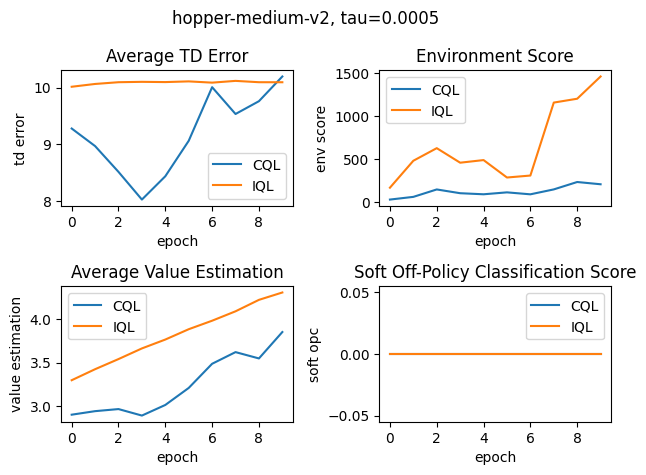

In [148]:
run_experiment("hopper-medium-v2", tau=0.0005)

load datafile: 100%|██████████| 21/21 [00:01<00:00, 11.91it/s]


2023-04-10 19:52:30 [debug    ] RandomIterator is selected.
2023-04-10 19:52:30 [info     ] Directory is created at d3rlpy_logs/CQL_20230410195230
2023-04-10 19:52:30 [debug    ] Building models...
2023-04-10 19:52:30 [debug    ] Models have been built.
2023-04-10 19:53:12 [info     ] Model parameters are saved to d3rlpy_logs/CQL_20230410195230/model_100.pt
2023-04-10 19:53:51 [info     ] Model parameters are saved to d3rlpy_logs/CQL_20230410195230/model_200.pt
2023-04-10 19:54:32 [info     ] Model parameters are saved to d3rlpy_logs/CQL_20230410195230/model_300.pt
2023-04-10 19:55:13 [info     ] Model parameters are saved to d3rlpy_logs/CQL_20230410195230/model_400.pt
2023-04-10 19:55:52 [info     ] Model parameters are saved to d3rlpy_logs/CQL_20230410195230/model_500.pt
2023-04-10 19:56:35 [info     ] Model parameters are saved to d3rlpy_logs/CQL_20230410195230/model_600.pt
2023-04-10 19:57:17 [info     ] Model parameters are saved to d3rlpy_logs/CQL_20230410195230/model_700.pt
2023

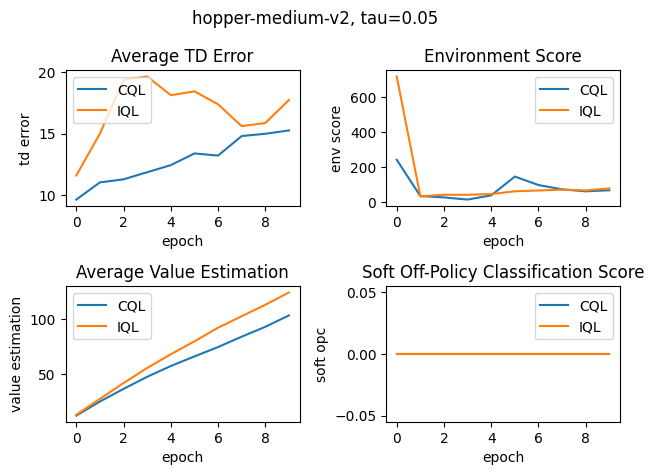

In [147]:
run_experiment("hopper-medium-v2", tau=0.05)

load datafile: 100%|██████████| 21/21 [00:01<00:00, 15.50it/s]


2023-04-10 19:32:55 [debug    ] RandomIterator is selected.
2023-04-10 19:32:55 [info     ] Directory is created at d3rlpy_logs/CQL_20230410193255
2023-04-10 19:32:55 [debug    ] Building models...
2023-04-10 19:32:55 [debug    ] Models have been built.
2023-04-10 19:33:38 [info     ] Model parameters are saved to d3rlpy_logs/CQL_20230410193255/model_100.pt
2023-04-10 19:34:18 [info     ] Model parameters are saved to d3rlpy_logs/CQL_20230410193255/model_200.pt
2023-04-10 19:35:35 [info     ] Model parameters are saved to d3rlpy_logs/CQL_20230410193255/model_300.pt
2023-04-10 19:36:17 [info     ] Model parameters are saved to d3rlpy_logs/CQL_20230410193255/model_400.pt
2023-04-10 19:36:59 [info     ] Model parameters are saved to d3rlpy_logs/CQL_20230410193255/model_500.pt
2023-04-10 19:37:40 [info     ] Model parameters are saved to d3rlpy_logs/CQL_20230410193255/model_600.pt
2023-04-10 19:38:20 [info     ] Model parameters are saved to d3rlpy_logs/CQL_20230410193255/model_700.pt
2023

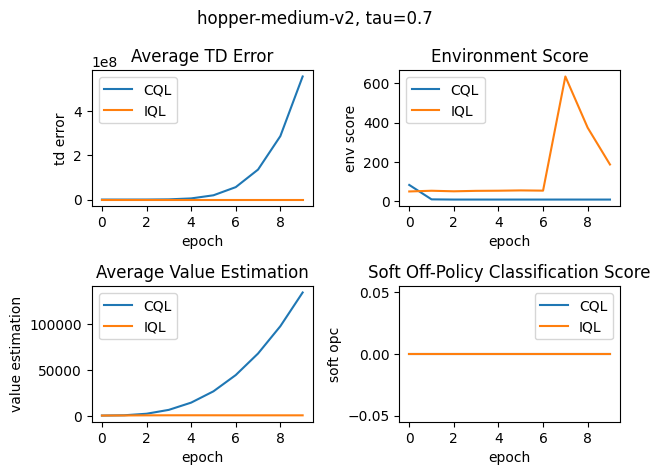

In [145]:
run_experiment("hopper-medium-v2", tau=0.7)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.9/dist-packages/gym/spaces/box.py:128: UserWarning: WARN: Box bound precision lowered by casting to float32
  upp_bounded = ~self.bounded_below & self.bounded_above
/usr/local/lib/python3.9/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  @abstractmethod
/usr/local/lib/python3.9/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one boo

2023-04-10 20:17:55 [debug    ] RandomIterator is selected.
2023-04-10 20:17:55 [info     ] Directory is created at d3rlpy_logs/CQL_20230410201755
2023-04-10 20:17:55 [debug    ] Building models...
2023-04-10 20:17:55 [debug    ] Models have been built.


/usr/local/lib/python3.9/dist-packages/gym/utils/passive_env_checker.py:227: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 


2023-04-10 20:18:47 [info     ] Model parameters are saved to d3rlpy_logs/CQL_20230410201755/model_100.pt
2023-04-10 20:19:35 [info     ] Model parameters are saved to d3rlpy_logs/CQL_20230410201755/model_200.pt
2023-04-10 20:20:23 [info     ] Model parameters are saved to d3rlpy_logs/CQL_20230410201755/model_300.pt
2023-04-10 20:21:10 [info     ] Model parameters are saved to d3rlpy_logs/CQL_20230410201755/model_400.pt
2023-04-10 20:21:57 [info     ] Model parameters are saved to d3rlpy_logs/CQL_20230410201755/model_500.pt
2023-04-10 20:22:43 [info     ] Model parameters are saved to d3rlpy_logs/CQL_20230410201755/model_600.pt
2023-04-10 20:23:30 [info     ] Model parameters are saved to d3rlpy_logs/CQL_20230410201755/model_700.pt
2023-04-10 20:24:17 [info     ] Model parameters are saved to d3rlpy_logs/CQL_20230410201755/model_800.pt
2023-04-10 20:25:05 [info     ] Model parameters are saved to d3rlpy_logs/CQL_20230410201755/model_900.pt
2023-04-10 20:25:51 [info     ] Model paramete

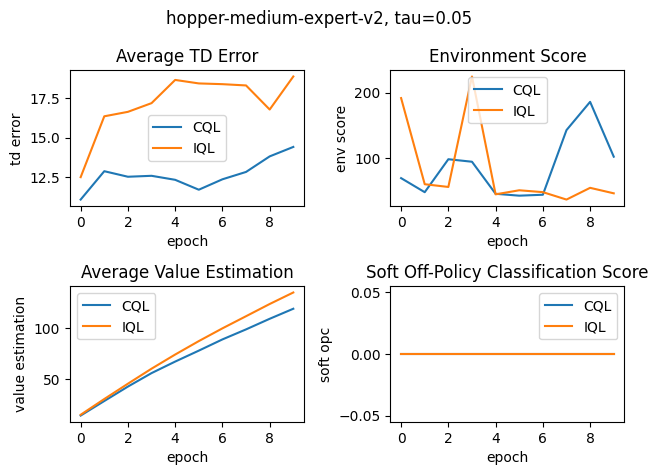

In [149]:
run_experiment("hopper-medium-expert-v2", tau=0.05)

load datafile: 100%|██████████| 9/9 [00:03<00:00,  2.82it/s]


2023-04-10 20:35:30 [debug    ] RandomIterator is selected.
2023-04-10 20:35:30 [info     ] Directory is created at d3rlpy_logs/CQL_20230410203530
2023-04-10 20:35:30 [debug    ] Building models...
2023-04-10 20:35:30 [debug    ] Models have been built.
2023-04-10 20:36:22 [info     ] Model parameters are saved to d3rlpy_logs/CQL_20230410203530/model_100.pt
2023-04-10 20:37:11 [info     ] Model parameters are saved to d3rlpy_logs/CQL_20230410203530/model_200.pt
2023-04-10 20:38:36 [info     ] Model parameters are saved to d3rlpy_logs/CQL_20230410203530/model_300.pt
2023-04-10 20:39:32 [info     ] Model parameters are saved to d3rlpy_logs/CQL_20230410203530/model_400.pt
2023-04-10 20:40:27 [info     ] Model parameters are saved to d3rlpy_logs/CQL_20230410203530/model_500.pt
2023-04-10 20:41:22 [info     ] Model parameters are saved to d3rlpy_logs/CQL_20230410203530/model_600.pt
2023-04-10 20:42:16 [info     ] Model parameters are saved to d3rlpy_logs/CQL_20230410203530/model_700.pt
2023

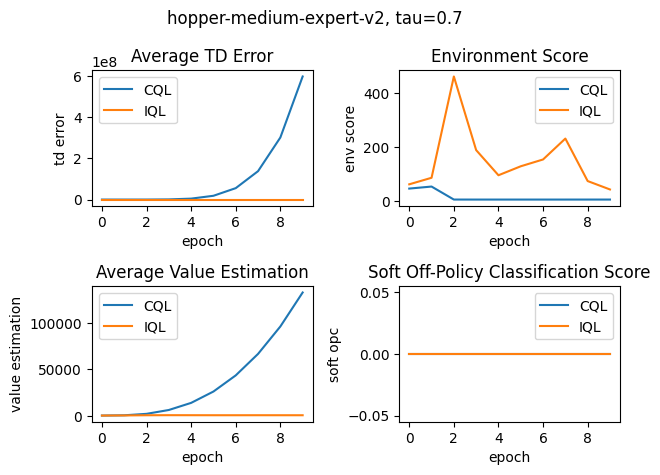

In [150]:
run_experiment("hopper-medium-expert-v2", tau=0.7)